In [53]:
# Para no tener que reiniciar el kernel
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import sys
import os
sys.path.append(os.path.abspath('../'))

In [55]:
# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------

from src import soporte_ajuste_logistica as sal
from src import soporte_logistica_ensamble as sle


In [56]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
df = pd.read_pickle('../datos/datos_preprocesados.pkl')

In [58]:
df.head()

,Attrition,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,EducationField,JobRole,...,Education_5.0,JobLevel_Head,JobLevel_Intern,JobLevel_Junior,JobLevel_Manager,JobLevel_Senior,StockOptionLevel_Bad,StockOptionLevel_Best,StockOptionLevel_Better,StockOptionLevel_Good
0,0.0,0.0,-0.9757428617518955,1.0,1.153846,0.0,-1.0,-0.083333,0.533045977011493,-0.4637062838161343,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.4248750185616,-0.384615,0.09952892067107169,0.0,0.250000,0.533045977011493,0.5238411596221293,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.7658035397332527,0.0,6.8505006797942904,-0.307692,0.09952892067107169,0.0,0.833333,-4.206791420725185,0.1773559143770109,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,-0.23419646026674737,-0.9757428617518955,0.0,0.153846,-0.06956855225311602,0.0,-0.416667,0.533045977011493,-0.7459473750454625,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,-0.23419646026674737,1.2600378155516458,0.0,-0.307692,0.0,0.0,0.250000,0.0,0.1773559143770109,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
df = df.astype(float)

Definimos un diccionario de hiperparámetros

In [72]:
parametros_default = {
            "logistic_regression": {
                'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'C': [0.01, 0.1, 1, 10, 100],
                'solver': ['liblinear', 'saga'],
                'max_iter': [100, 200, 500]
            },
            "tree": {
                'max_depth': [3, 5, 10],
                'min_samples_split': [2, 10, 15],
                'min_samples_leaf': [1, 4, 8]
            },
            "random_forest": {
                'n_estimators': [25, 50, 75],
                'max_depth': [5, 10, 15, 20],
                'min_samples_split': [1, 2, 5],
                'min_samples_leaf': [2, 4, 6]
            },
            "gradient_boosting": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 4, 5],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'subsample': [0.8, 1.0]
            },
            "xgboost": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [5, 7, 9],
                'min_child_weight': [1, 3, 5],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0]
            }}

In [61]:
parametros_default = {
            "logistic_regression": {
                'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'C': [0.01, 0.1, 1, 10, 100],
                'solver': ['liblinear', 'saga'],
                'max_iter': [100, 200, 500]
            },
            "tree": {
                'max_depth': [3, 5, 7, 10],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            },
            "random_forest": {
                'n_estimators': [100, 300, 500],
                'max_depth': [3, 5, 7, 10],
                'min_samples_split': [5, 10, 15],
                'min_samples_leaf': [3, 5, 10],
                'max_samples': [0.5, 0.7, 0.9]
            },
            "gradient_boosting": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 4, 5],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'subsample': [0.8, 1.0]
            },
            "xgboost": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 4, 5],
                'min_child_weight': [1, 3, 5],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0]
            }
        }

In [62]:
logistica = sle.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_regresion = logistica.calcular_metricas(modelo_nombre = "logistic_regression")
df_resultados_regresion["modelo"] = "logistic_regression"
df_resultados_regresion

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.857470,0.835351,0.857470,0.821989,0.242140,0.806934,0.004983,NaN,NaN,NaN,logistic_regression
test,0.861556,0.846553,0.861556,0.829951,0.298053,0.815054,NaN,NaN,0.004983,NaN,logistic_regression


A pesar del acusado desbalanceo , la precisión y el recall nos dicen que predice  bien la clase minoritaria (la del Yes), en todo caso el peor dato de esta métrica es la kappa que es muy baja, y acerca el modelo al de la prediccion aleatoria.

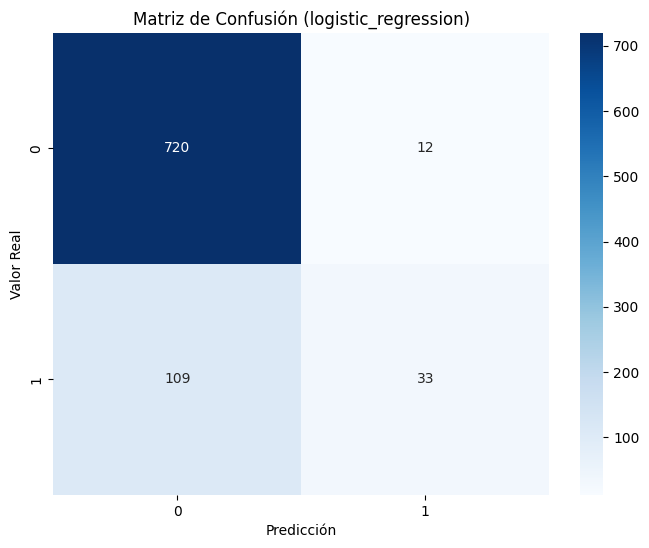

In [63]:
logistica.plot_matriz_confusion("logistic_regression")

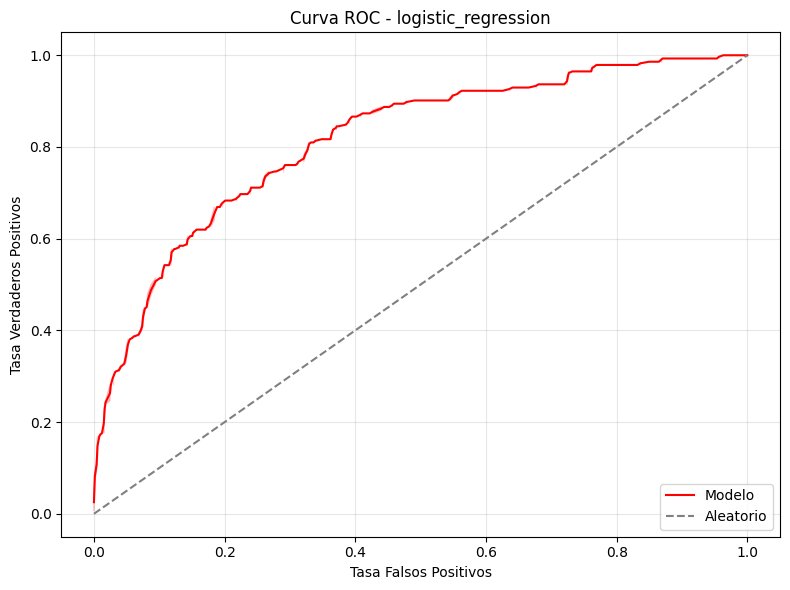

In [64]:
logistica.plot_curva_roc("logistic_regression")

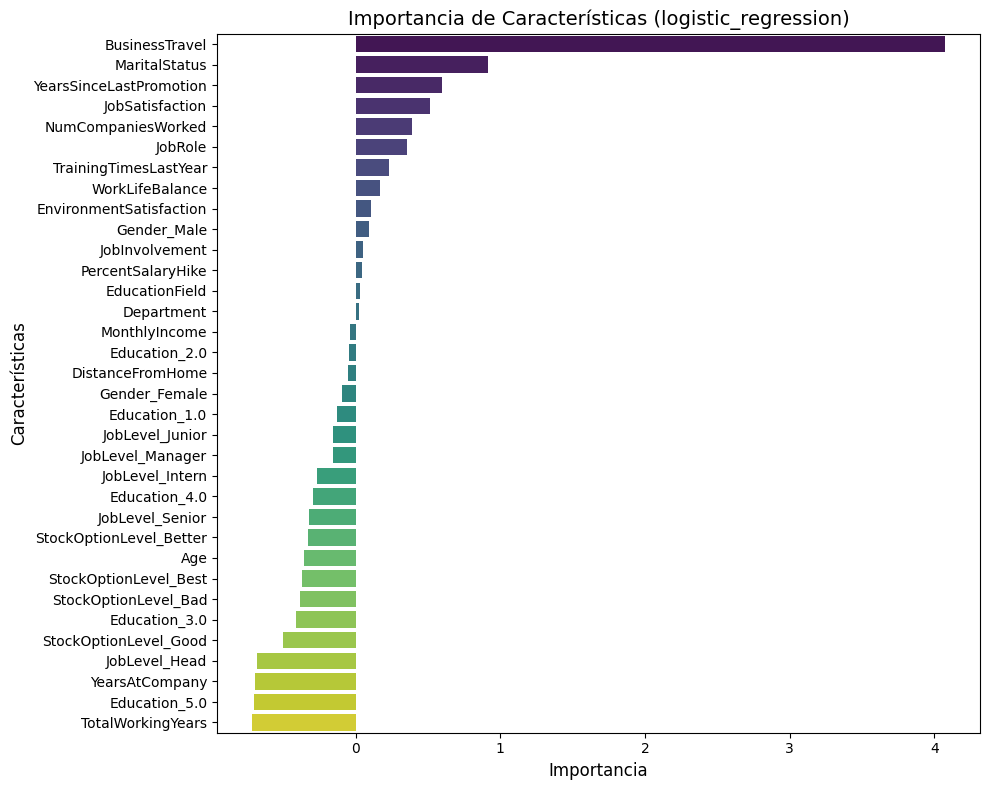

In [65]:
logistica.importancia_predictores("logistic_regression")

### DECISION TREE

In [71]:
logistica = sle.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("tree")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_tree = logistica.calcular_metricas(modelo_nombre = "tree")
df_resultados_tree["modelo"] = "tree"
df_resultados_tree 

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.954493,0.953722,0.954493,0.952708,0.815797,0.965826,0.004986,4.0,NaN,NaN,tree
test,0.933638,0.931468,0.933638,0.930135,0.731800,0.932574,NaN,NaN,0.004986,4.0,tree


En este modelo las metricas son francamente mejores, si acaso, la kappa del test es algo inferior a las otras, pero es un modelo, que pese al desbalanceo predice bastante bien positivos y negativos.

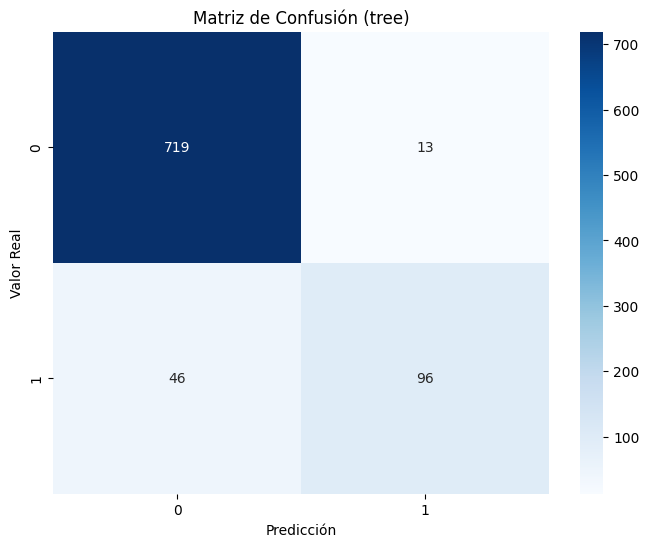

In [67]:
logistica.plot_matriz_confusion("tree")

Vemos que los verdaderos positivos y los verdaderos netativos son mayores que los falsos positivos y los falsos negativos

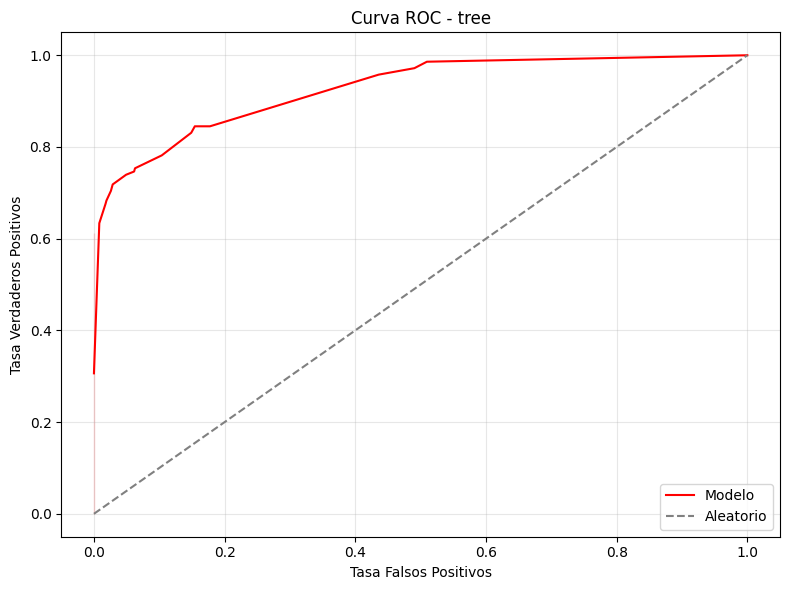

In [68]:
logistica.plot_curva_roc("tree")

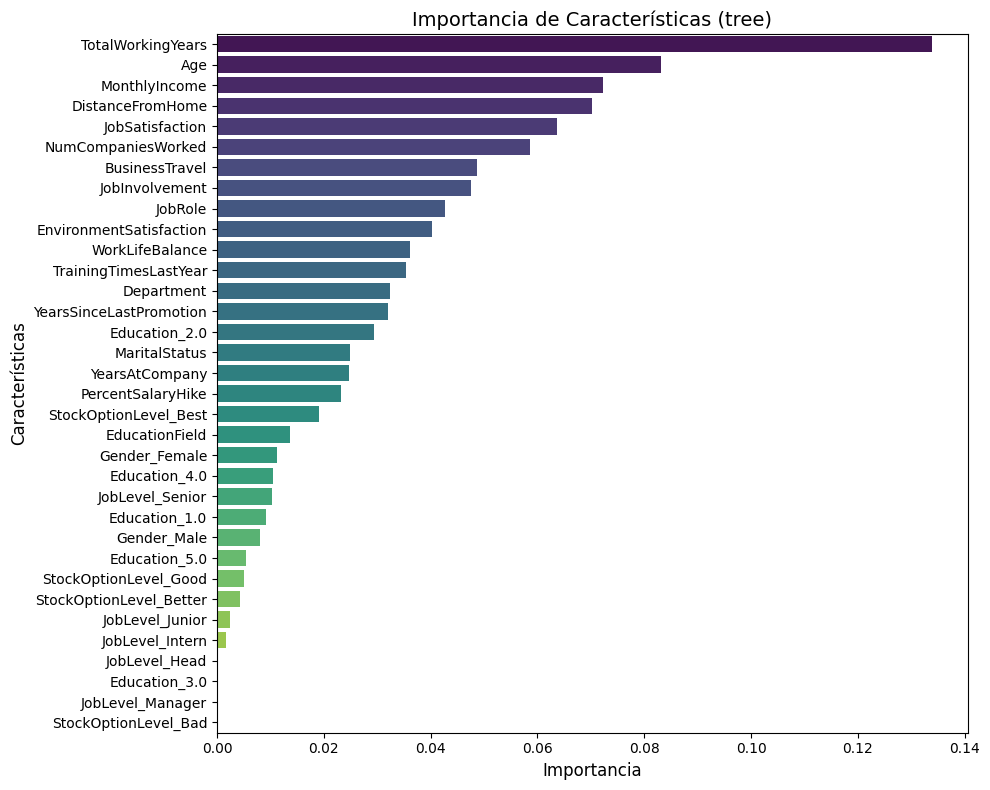

In [69]:
logistica.importancia_predictores("tree")

### RANDOM FOREST

In [73]:
logistica = sle.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("random_forest")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_rf = logistica.calcular_metricas(modelo_nombre = "random_forest")
df_resultados_rf["modelo"] = "random_forest"
df_resultados_rf 

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.998283,0.998286,0.998283,0.998279,0.993507,0.999996,0.061838,-1.0,NaN,NaN,random_forest
test,0.983982,0.984282,0.983982,0.983642,0.938706,0.999673,NaN,NaN,0.061838,-1.0,random_forest


Estas métricas son extraordinarias. Todas por encima de 0,93. Pese al desbalanceo, los positivos y los negativos se detectan con mucha exatitud. La kappa tan alta demuestra que estamos muy lejos de la aleatoriedad.

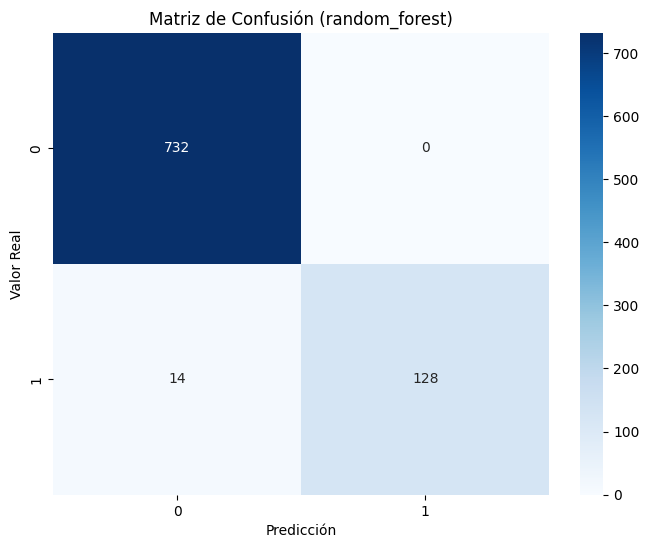

In [74]:
logistica.plot_matriz_confusion("random_forest")

La matriz evidencia la exactitud de la predicción con el random forest, no hay falsos positivos, y hay muy muy pocos falsos negativos.

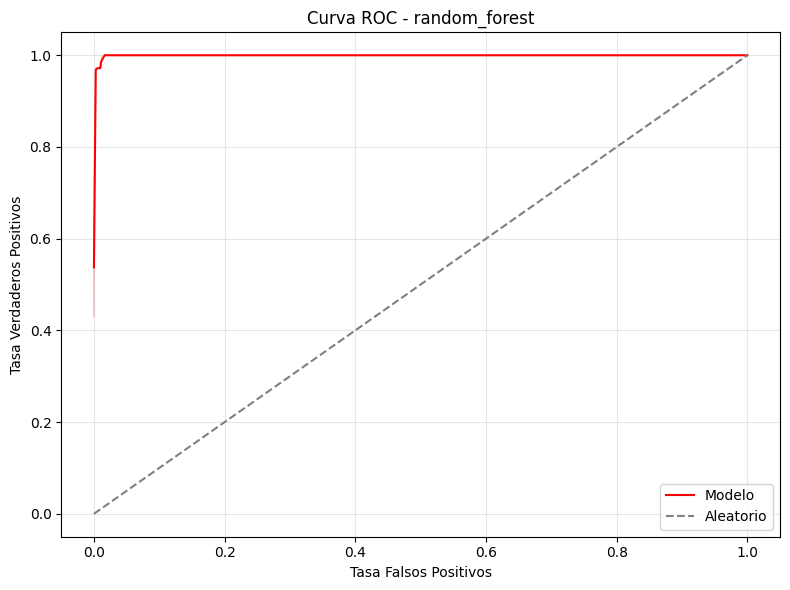

In [75]:
logistica.plot_curva_roc("random_forest")

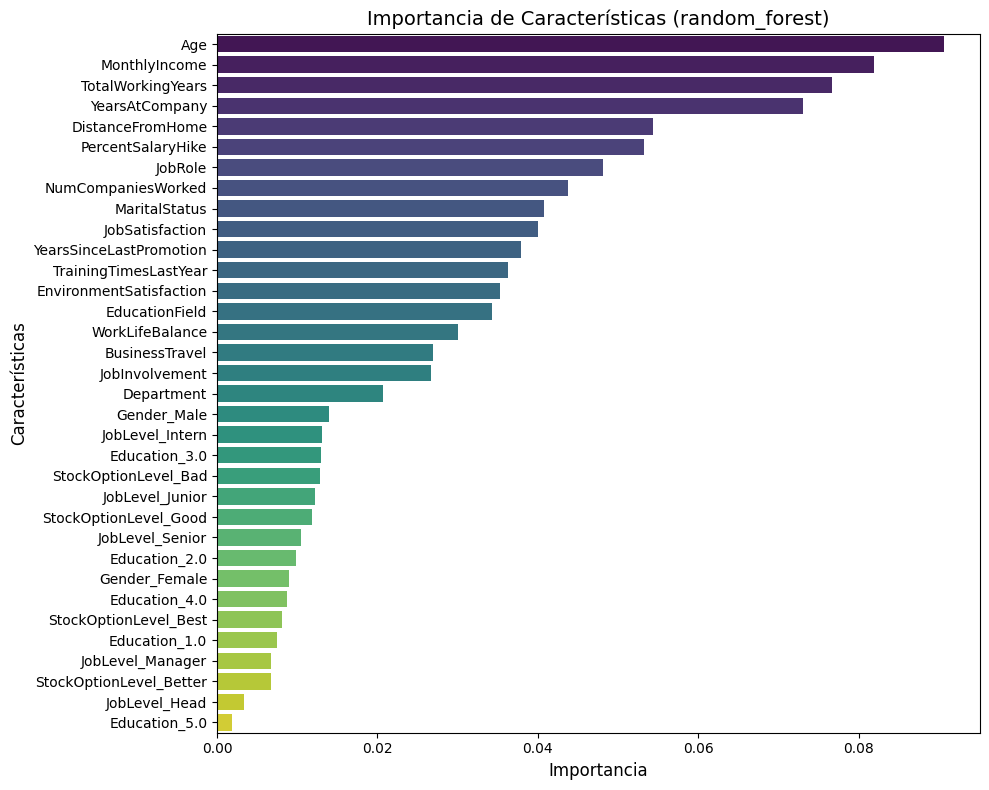

In [76]:
logistica.importancia_predictores("random_forest")

### Gradient Boosting

In [78]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("gradient_boosting")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gb = logistica.calcular_metricas(modelo_nombre = "gradient_boosting")
df_resultados_gb["modelo"] = "gradient_boosting"
df_resultados_gb 

KeyboardInterrupt: 